<h1>逻辑回归<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#逻辑回归" data-toc-modified-id="逻辑回归-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>逻辑回归</a></span></li><li><span><a href="#工具包" data-toc-modified-id="工具包-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>工具包</a></span></li><li><span><a href="#数据" data-toc-modified-id="数据-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>数据</a></span></li><li><span><a href="#函数" data-toc-modified-id="函数-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>函数</a></span></li><li><span><a href="#导数" data-toc-modified-id="导数-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>导数</a></span></li><li><span><a href="#似然" data-toc-modified-id="似然-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>似然</a></span></li><li><span><a href="#更新" data-toc-modified-id="更新-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>更新</a></span></li></ul></div>

# 逻辑回归

# 工具包

# 数据

给定训练数据$D=\{\mathbf{x}_i , y_i\}_{i=1}^{m}$(**training set**),    
每组$(\mathbf{x}_i , y_i)$(**training example**)都是一组训练样例,在此例中训练总数据个数m=9   
$\mathbf{x}_i$(**features**),是n维向量,在此例中n=3,即有3个特征   
$y_i\in \mathbb{R}$(**target**),是监督学习中的目标变量,
* $y_i$是连续变量时为回归(**regression**),
* $y_i$是离散变量时为分类(**classification**)

# 函数

对于二分类问题, $y \in \{0,1\}$,   
0可以认为是消极类别(**negative class**),   
1可以认为是积极类别(**negative class**)    
此时,线性分类的性能就不太理想,于是引入逻辑回归   
$$
h_\theta(x)=g(\theta^Tx)=\frac{1}{1+e^{-\theta^Tx}}\\
$$

其中:
$$
g(z)=\frac{1}{1+e^{-z}}
$$
$g(z)$被称为逻辑函数(**logistic function**),   
也叫双弯曲S型函数(**sigmoid function**)    
其函数图像为   
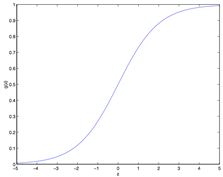

从函数表达式以及图像可以看出,   
$$
当z \to -\infty 时,g(z) \to 0\\
当z \to 0 时,\ \ g(z) \to 0.5\\
当z \to +\infty 时,g(z) \to 1\\
$$

回归学习的目的是学习到一个从输入$\mathcal{X}$到输出$\mathcal{Y}$的映射$h$(**hypothesis**)   
为了简写方便,定义预测值:$\hat{y} = h(\mathbf{x})$   
$$
h_\theta(x)= \theta^Tx =\sum_{i=0}^n \theta_i x_i 
$$
其中$\theta_i$(**weights/parameters**)称为权重项   
$b=\theta_0x_0,x_0=1$(**intercept term**)称为偏置项

# 导数

对函数$g(z)$求导得   
$$
\begin{eqnarray}
g'(z) & = & \frac{d}{dz} (\frac{1}{1+e^{-z}})\\
& = & \frac{-1}{(1+e^{-z})^2} (-e^{-z}) = \frac{e^{-z}}{(1+e^{-z})^2}\\
& = & \frac{1}{1+e^{-z}} \cdot \frac{e^{-z}+1-1}{1+e^{-z}}\\
& = & \frac{1}{1+e^{-z}} \cdot \big( 1-\frac{1}{1+e^{-z}} \big)\\
& = & g(z)(1-g(z))
\end{eqnarray}
$$

# 似然

由于最小二乘回归可由极大似然估计推出   

$$
假设:
\begin{eqnarray}
P(y=1|\ x;\theta) & = & h_\theta(x)\\
P(y=0|\ x;\theta) & = & 1 - h_\theta(x)\\
\end{eqnarray}\\
更简洁的写法:
P(y|x;\theta) = (h_\theta(x))^y \ (1 - h_\theta(x))^{1-y}\\
$$

则似然函数为:   
$$
\begin{eqnarray}
L(\theta) & = & p(\vec{y}\ |\ X;\theta)\\
& = & \prod_{i=1}^{m} \ p(y^{(i)}\ |\ x^{(i)};\theta)\\
& = & \prod_{i=1}^{m} \ (h_\theta(x^{(i)}))^{y^{(i)}}\ 
(1 - h_\theta(x^{(i)}))^{1-y^{(i)}} \\
\end{eqnarray}
$$

取对数得
$$
\begin{eqnarray}
\ell(\theta) & = & log \ L(\theta)\\
& = & \sum_{i=1}^{m} \ {y^{(i)}}log\ h_\theta(x^{(i)})\ 
+{(1-y^{(i)})}log(1 - h_\theta(x^{(i)})) \\
\end{eqnarray}
$$

# 更新

怎么让似然函数最大呢?
这次使用牛顿法(**Newton’s method**)
$$
\theta^{(t+1)} := \theta^{(t)} -\frac{f(\theta^{(t)})}{f'(\theta^{(t)})}\\
tan(\alpha) 
= \frac{h}{\Delta} \Rightarrow 
\Delta 
= \frac{h}{tan(\alpha)} 
= \frac{f(\theta)}{f'(\theta)}
$$

理解成用一个线性函数来对函数$f$ 进行逼近,   
这条直线是$f$ 的切线, 而猜测值是$\theta$,   
解的方法就是找到线性方程等于0的点,    
把这一个零点作为$\theta$ 设置给下一次猜测,   
然后依次类推

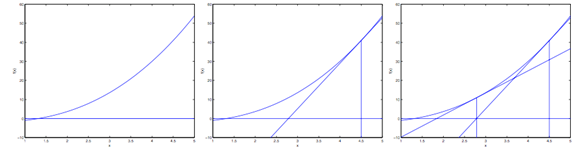

牛顿法进行扩展到多维情况,   
也叫牛顿-拉普森法(**Newton-Raphson method**)
$$
\theta^{(t+1)} :=  \theta^{(t)} 
-H^{-1}\nabla_\theta \ell(\theta^{(t)})
$$
$H$是Hessian矩阵, 一个n*n矩阵(若包含截距项(n+1)*(n+1))   
定义是:先对$\theta_i$ 求偏导, 再对$\theta_j$ 求偏导
$$
H_{ij}=\frac{\partial^2 \ell(\theta)}{\partial\theta_i\ \partial\theta_j}
$$

牛顿法通常都能比(批量)梯度下降法收敛得更快,   
而且达到最小值所需要的迭代次数也低很多.   
然而,牛顿法中的单次迭代往往要比梯度下降法的单步耗费更多的性能开销,   
因为要查找和转换一个n*n的Hessian矩阵;   
不过只要这个n不是太大,牛顿法通常就还是更快一些.